# Classification and Logistic Regression

### Loading packages

In [1]:
# Import a bunch of libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# import data set
from sklearn.datasets import load_iris

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [2]:
# Neues notebook!!!!!

# Load the data, which is included in sklearn.
iris = load_iris()
target_names = iris.target_names
feature_names = iris.feature_names
print('Iris target names:', target_names[:2])
print('Iris feature names:', feature_names)
targets_idx = np.where(iris.target > 0)
X, Y = iris.data[targets_idx], iris.target[targets_idx]

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
X_train, Y_train = X[:70], Y[:70]
X_test, Y_test = X[70:], Y[70:]

Iris target names: ['setosa' 'versicolor']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Plotting the data

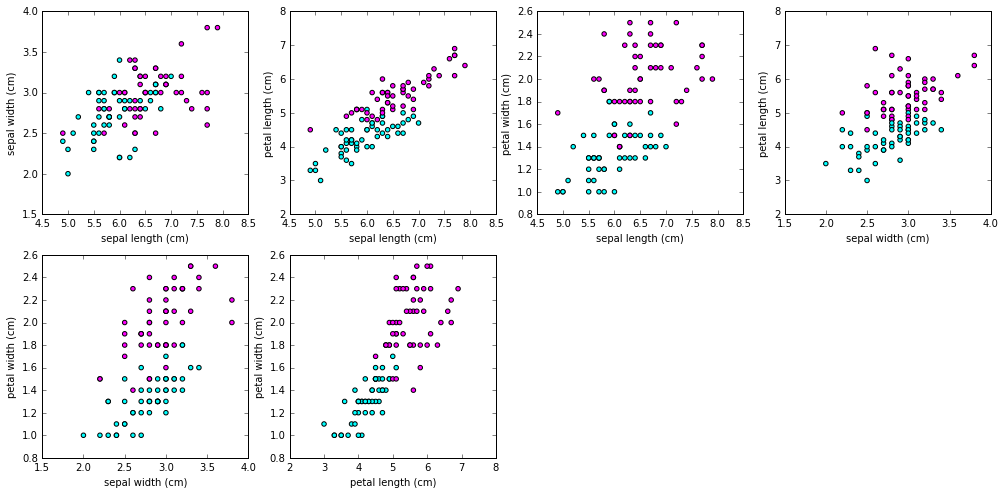

In [3]:

fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(2,4,1)
ax1.scatter(X[:,0], X[:,1], c = Y, cmap=plt.cm.cool)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])

ax2 = fig.add_subplot(2,4,2)
ax2.scatter(X[:,0], X[:,2], c = Y, cmap=plt.cm.cool)
ax2.set_xlabel(feature_names[0])
ax2.set_ylabel(feature_names[2])

ax3 = fig.add_subplot(2,4,3)
ax3.scatter(X[:,0], X[:,3], c = Y, cmap=plt.cm.cool)
ax3.set_xlabel(feature_names[0])
ax3.set_ylabel(feature_names[3])

ax4 = fig.add_subplot(2,4,4)
ax4.scatter(X[:,1], X[:,2], c = Y, cmap=plt.cm.cool)
ax4.set_xlabel(feature_names[1])
ax4.set_ylabel(feature_names[2])

ax5 = fig.add_subplot(2,4,5)
ax5.scatter(X[:,1], X[:,3], c = Y, cmap=plt.cm.cool)
ax5.set_xlabel(feature_names[1])
ax5.set_ylabel(feature_names[3])

ax6 = fig.add_subplot(2,4,6)
ax6.scatter(X[:,2], X[:,3], c = Y, cmap=plt.cm.cool)
ax6.set_xlabel(feature_names[2])
ax6.set_ylabel(feature_names[3])

plt.show()

### Logistic regression

In [4]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
preds = lr.predict(X_test)
accuracy = np.mean(preds == Y_test)
print("Accuracy is: ", accuracy)
print("Predictions:    ", preds[:20])
print("Correct labels: ", Y_test[:20])

## with lr.predict_proba we obtain the results after application of the sigmoid function. 
## lr.predict returns the argmax of lr.predict_proba
probs = lr.predict_proba(X_test)
print("Certainties: \n", probs[:20])

## Let's have a look at the probabilities of the wrongly predicted samples
wrongs = np.where(preds != Y_test)
print("\nCertainties of wrong predictions:\n", probs[wrongs])

Accuracy is:  0.966666666667
Predictions:     [1 1 1 2 2 2 2 2 2 2 1 1 2 1 1 2 2 1 2 2]
Correct labels:  [1 1 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2]
Certainties: 
 [[ 0.8771419   0.1228581 ]
 [ 0.96468009  0.03531991]
 [ 0.83834859  0.16165141]
 [ 0.30718744  0.69281256]
 [ 0.1404146   0.8595854 ]
 [ 0.2561519   0.7438481 ]
 [ 0.46979066  0.53020934]
 [ 0.09063024  0.90936976]
 [ 0.0808456   0.9191544 ]
 [ 0.42280336  0.57719664]
 [ 0.91547938  0.08452062]
 [ 0.77083576  0.22916424]
 [ 0.46462749  0.53537251]
 [ 0.82889182  0.17110818]
 [ 0.75890652  0.24109348]
 [ 0.16939656  0.83060344]
 [ 0.12122009  0.87877991]
 [ 0.89683938  0.10316062]
 [ 0.43757982  0.56242018]
 [ 0.15640516  0.84359484]]

Certainties of wrong predictions:
 [[ 0.46979066  0.53020934]]


Find the best regularization parameter for L2-regularization.

In [5]:
c_vec = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

for c in c_vec:
    lr = LogisticRegression(penalty='l2', C=c)
    lr.fit(X_train, Y_train)
    preds = lr.predict(X_test)
    accuracy = np.mean(preds == Y_test)
    print("C is: ", c)
    print("Accuracy is: ", accuracy, "\n")

C is:  0.0001
Accuracy is:  0.533333333333 

C is:  0.001
Accuracy is:  0.533333333333 

C is:  0.01
Accuracy is:  0.666666666667 

C is:  0.1
Accuracy is:  0.966666666667 

C is:  1
Accuracy is:  0.966666666667 

C is:  10
Accuracy is:  0.933333333333 

C is:  100
Accuracy is:  0.933333333333 

C is:  1000
Accuracy is:  0.966666666667 

C is:  10000
Accuracy is:  0.9 

C is:  100000
Accuracy is:  0.9 



The best values for c are 0.1, 1, and 1000.

Find the best values for L1 regularization.

In [6]:
c_vec = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

for c in c_vec:
    lr = LogisticRegression(penalty='l1', C=c)
    lr.fit(X_train, Y_train)
    preds = lr.predict(X_test)
    accuracy = np.mean(preds == Y_test)
    print("C is: ", c)
    print("Accuracy is: ", accuracy)
    coefs = lr.coef_[0]
    if np.any(coefs != 0):
        print("Important features are: ", np.where(coefs != 0)[0])
    if np.any(coefs == 0):
        print("Features with weight 0 are: ", np.where(coefs == 0)[0])
    print("Features weights in decreasing order: ", np.argsort(-coefs))
    print()
print('Most important feature: ', feature_names[2], feature_names[3])

C is:  0.0001
Accuracy is:  0.466666666667
Features with weight 0 are:  [0 1 2 3]
Features weights in decreasing order:  [0 1 2 3]

C is:  0.001
Accuracy is:  0.466666666667
Features with weight 0 are:  [0 1 2 3]
Features weights in decreasing order:  [0 1 2 3]

C is:  0.01
Accuracy is:  0.466666666667
Features with weight 0 are:  [0 1 2 3]
Features weights in decreasing order:  [0 1 2 3]

C is:  0.1
Accuracy is:  0.533333333333
Important features are:  [2]
Features with weight 0 are:  [0 1 3]
Features weights in decreasing order:  [2 0 1 3]

C is:  1
Accuracy is:  0.9
Important features are:  [0 1 2 3]
Features weights in decreasing order:  [3 2 0 1]

C is:  10
Accuracy is:  0.933333333333
Important features are:  [0 1 2 3]
Features weights in decreasing order:  [3 2 0 1]

C is:  100
Accuracy is:  0.966666666667
Important features are:  [0 1 2 3]
Features weights in decreasing order:  [3 2 0 1]

C is:  1000
Accuracy is:  0.9
Important features are:  [0 1 2 3]
Features weights in decre

Accuracy is best with C = 100. Feature 2 and 3 seem to be most predictive.